# Use sklearn to test some predictors
Explore some hyperparameters and noise/data-size relations using the following classifiers:

1. support vector classifier 
2. random forests 
3. gradient boosting 
4. logistic regression

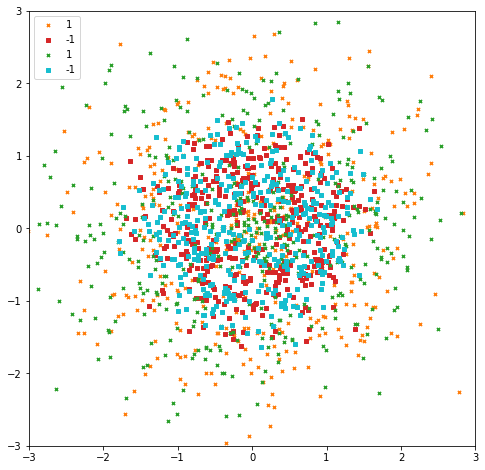

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
import matplotlib
import pandas as pd
from mlxtend.plotting import plot_decision_regions
matplotlib.rcParams['figure.figsize'] = [8, 8]

# data
def donut_data(N,noise):
    X = np.random.randn(N, 2)
    X_r = X + np.random.uniform(-noise,noise,X.shape)
    Y = np.logical_or(X_r[:, 0]*X_r[:, 0] + X_r[:, 1]*X_r[:, 1] < 0.3, X_r[:, 0]*X_r[:, 0] + X_r[:, 1]*X_r[:, 1]> 2)
    Y = np.where(Y, 1, -1)
    return X, Y

def plot_data(X,Y,c1='b',c2='r', toplot=True):
    plt.scatter(X[Y==1, 0], X[Y==1, 1],c=c1, marker='x',s=10, label='1')
    plt.scatter(X[Y==-1, 0], X[Y==-1, 1],c=c2, marker='s',s=10, label='-1')
    if toplot:
        plt.ylim(bottom=-3.0, top=3)
        plt.xlim(left=-3.0, right=3)
        
        plt.legend()
        plt.show()


N = 800
noise = 0.5
XL, yL = donut_data(N, noise)
XT, yT = donut_data(N, noise)


plot_data(XL,yL,'C1','C3', False)


plot_data(XT,yT,'C2','C9', True)



In [2]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

from collections import OrderedDict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LogisticRegression              


numK=10 #here it's possible to choose the number of folds
print(numK)
kf = KFold(n_splits=numK,shuffle=True, random_state=None)




10


# 1. Support Vector Machine#

 - - - - rbf - - - - 
Best gamma and C are: 
{'C': 0.31622776601683794, 'gamma': 10.0}
Training Score: 
0.78375
Test Score: 
0.75
 - - - - poly - - - - 


KeyboardInterrupt: 

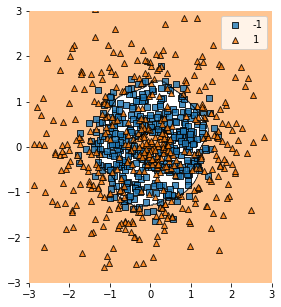

In [3]:
Kernel_List=['rbf', 'poly', 'linear', 'sigmoid']
C_array=np.logspace(-1, 1, 5)
gamma_array=np.logspace(-5, 1, 20)
i=0
params=[]
plt.figure(figsize=(20,5))
for kernel in Kernel_List:
    i+=1
    print(" - - - - "+ kernel + " - - - - ")
    svc=SVC(kernel=kernel,degree=2) #fissiamo il grado a 2 per velocizzare i calcoli
    gs = model_selection.GridSearchCV(svc, param_grid={"gamma": gamma_array,"C": C_array},cv=kf,n_jobs=-1)
    gs.fit(XL, yL)
    params.append(gs.best_params_)
    print("Best gamma and C are: ")
    print(gs.best_params_)
    s = cross_val_score(gs, XL, yL, cv=kf)
    print("Training Score: ")
    print(np.mean(s))
    svc.C= gs.best_params_["C"]
    svc.gamma=gs.best_params_["gamma"]
    svc.fit(XL,yL)
    print("Test Score: ")
    print(svc.score(XT, yT))

    plt.subplot(1,4,i)
    plot_decision_regions(XT, yT, svc)
    plt.ylim(bottom=-3.0, top=3)
    plt.xlim(left=-3.0, right=3)
    plt.legend(loc='upper right')

plt.show()
 
    

# Random Forests#

In [4]:
def Forestofplants(criterion):
    plants=np.arange(10,1000,150)
    score_list=[]
    RF=RandomForestClassifier(criterion=criterion)
    max_samples_array=np.linspace(0.5,1,6)
    max_depht_array=np.arange(1,14,2)
    params=[]
    for N in plants:
        #print(N)
        RF.n_estimators = N
        gs = model_selection.GridSearchCV(RF, param_grid={"max_samples": max_samples_array,
                                                   "max_depth": max_depht_array}, cv=kf,  n_jobs=-1)
   
        gs.fit(XL, yL)
    
        s = cross_val_score(gs, XL, yL, cv=kf)
        score_list.append(np.mean(s))
        params.append((gs.best_params_["max_samples"],gs.best_params_["max_depth"]))
    
    
    N_1=plants[np.argmax(score_list)]
    RF.n_estimators=N_1
    RF.max_samples=params[np.argmax(score_list)][0]
    RF.max_depth=params[np.argmax(score_list)][1]
    RF.fit(XL,yL)

    print(" - - - - "+ criterion + " - - - - ")
    print(N_1, np.max(score_list), gs.best_params_)
    print("Test score: ")
    print(RF.score(XT, yT))

    plt.figure(figsize=(18,9))
    plt.subplot(1,2,1)
    plt.plot(plants,score_list)
    plt.title("Number plants vs. score for " + criterion)

    plt.subplot(1,2,2)
    plot_decision_regions(XT, yT, RF)
    plt.title("Decision regions for " + criterion)
    

 - - - - entropy - - - - 
610 0.7487499999999999 {'max_depth': 11, 'max_samples': 0.5}
Test score: 
0.7575


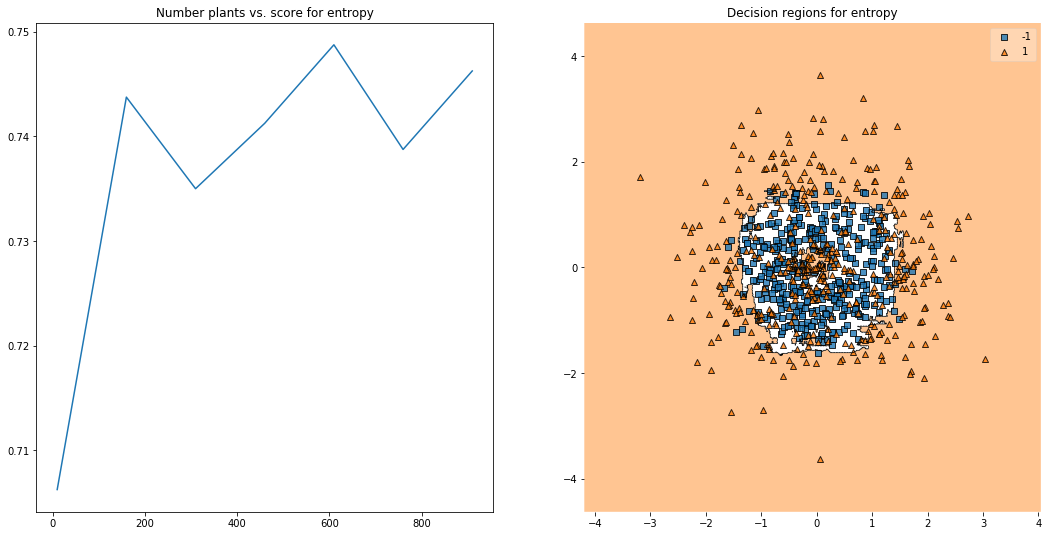

In [5]:
Forestofplants('entropy')

 - - - - gini - - - - 
610 0.76 {'max_depth': 9, 'max_samples': 0.6}
Test score: 
0.77625


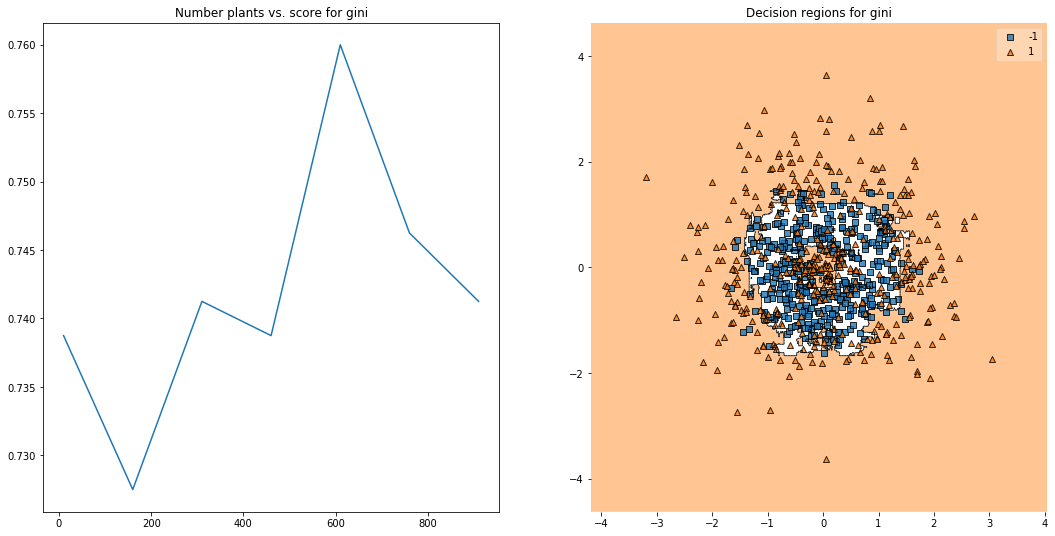

In [6]:
Forestofplants('gini')

# 3. Gradient Boosting 

 - - - - Stumps - - - - 
n_estimators  - Score - Learning rate
910 0.7274999999999999 0.016681005372000592
Test score: 
0.7175


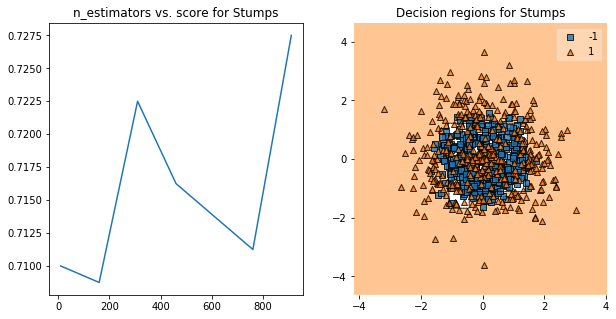

 - - - - GB_5 - - - - 
n_estimators  - Score - Learning rate
310 0.72875 0.016681005372000592
Test score: 
0.74875


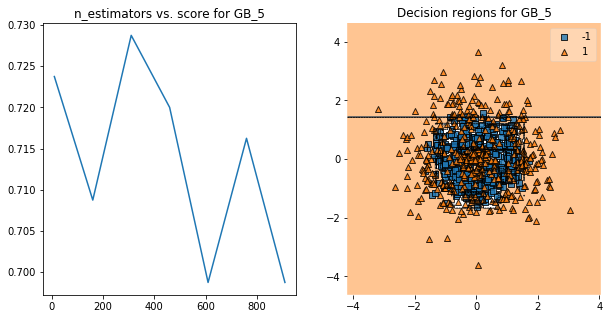

 - - - - GB_100 - - - - 
n_estimators  - Score - Learning rate
10 0.71 0.12915496650148828
Test score: 
0.69


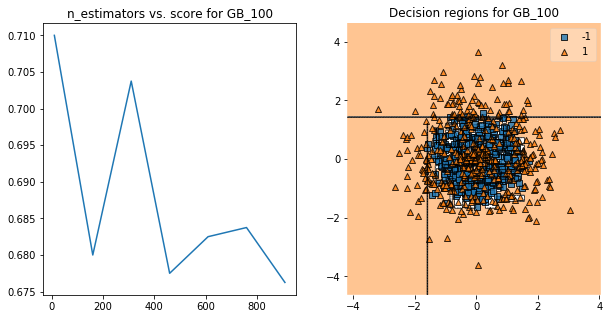

 - - - - ADAB - - - - 
n_estimators  - Score - Learning rate
910 0.7350000000000001 0.002154434690031882
Test score: 
0.7125


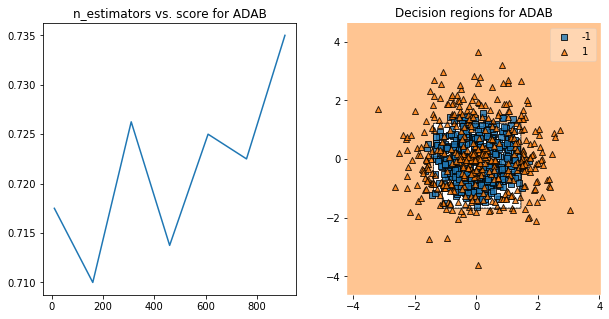

In [7]:
models = OrderedDict([
          ('Stumps', GradientBoostingClassifier(loss='deviance',max_depth=1,random_state=0)),
          ('GB_5', GradientBoostingClassifier(loss='deviance',max_depth=5,random_state=0)),
          ('GB_100',GradientBoostingClassifier(loss='deviance',max_depth=100,random_state=0)),
          ('ADAB', AdaBoostClassifier(random_state=0))])


l_rates = np.logspace(-4,0,10)
n_estimators = np.arange(10,1000,150)


for key in models:
    GBC = models[key]
    param=[]
    scores=[]
    for N in n_estimators:
        #print(N)
        GBC.n_estimators=N
        gs = model_selection.GridSearchCV(GBC, param_grid={"learning_rate":l_rates}, cv=kf, n_jobs=-1)
        gs.fit(XL,yL)
        s = cross_val_score(gs, XL, yL, cv=kf)
        scores.append(np.mean(s))
        param.append(gs.best_params_["learning_rate"])

    N_1=n_estimators[np.argmax(scores)]
    GBC.n_estimators=N_1
    GBC.learning_rate=param[np.argmax(scores)]
    GBC.fit(XL,yL)
    
    print(" - - - - "+ key + " - - - - ")
    print("n_estimators  - Score - Learning rate")
    print(N_1,  np.max(scores), param[np.argmax(scores)])
    print("Test score: ")
    print(GBC.score(XT, yT))
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(n_estimators,scores)
    plt.title("n_estimators vs. score for " + key)

    plt.subplot(1,2,2)
    plot_decision_regions(XT, yT, GBC)
    plt.title("Decision regions for " + key)

    plt.show()
    



# 4. Logistic regression#
Here we use a logistic regression classifier using scikit libraries, varying some parameters. We do not expect it is going to behave well because the data are donut-shaped and yet not linearly separable.

Best C and training score for L2 loss: 
233.57214690901213 0.47000000000000003
Test score: 
0.4675
Best C and training score for L1 loss:
0.1 0.47375
Test score: 
0.48625


Text(0.5, 1.0, 'Decision regions for L1 loss')

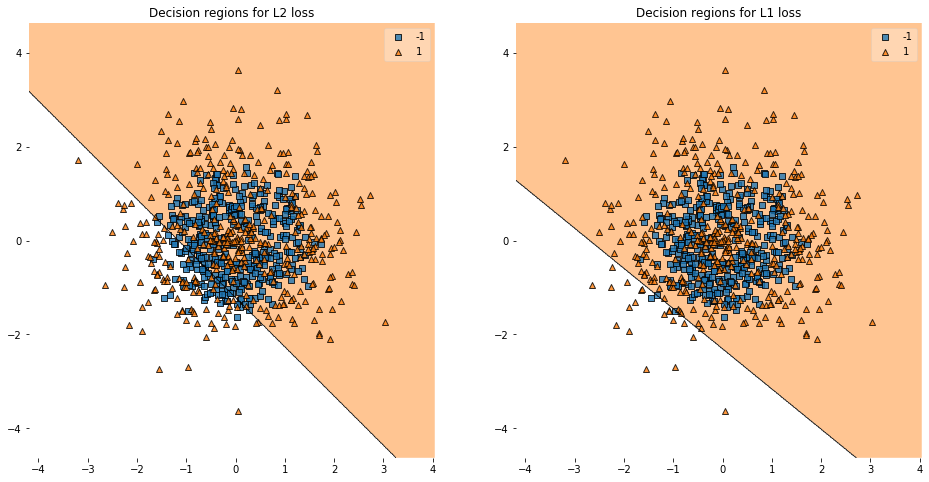

In [8]:
lr2 = LogisticRegression(solver='liblinear', penalty='l2') #l2 loss
lr1 = LogisticRegression(solver='liblinear', penalty='l1') #loss l1
scores1=[]
scores2=[]
C_array=np.logspace(-1,3,20)


for C in C_array:
    lr1.C=C
    lr2.C=C
    s1 = cross_val_score(lr1, XL, yL, cv=kf)
    s2 = cross_val_score(lr2, XL, yL, cv=kf)
    scores1.append(np.mean(s1))
    scores2.append(np.mean(s2))

C_1=C_array[np.argmax(scores1)]
C_2=C_array[np.argmax(scores2)]


lr1.C=C_1
lr2.C=C_2    
lr1.fit(XL,yL)
lr2.fit(XL,yL)

print("Best C and training score for L2 loss: ")
print(C_2, np.max(scores2))
print("Test score: ")
print(lr2.score(XT, yT))
print("Best C and training score for L1 loss:")
print(C_1, np.max(scores1))
print("Test score: ")
print(lr1.score(XT, yT))

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_decision_regions(XT, yT, lr2)
plt.title("Decision regions for L2 loss")
plt.subplot(1,2,2)
plot_decision_regions(XT, yT, lr1)
plt.title("Decision regions for L1 loss")


# 5. Noise data-size relations #

In [9]:
def generate_data(N, noise):
    XL, yL = donut_data(N, noise)
    XT, yT = donut_data(N, noise)
    return XL, yL, XT, yT

models = OrderedDict([
          ('Svc_rbf', SVC(kernel="rbf", C= 0.6, gamma= 10)),
          ('GB_5', GradientBoostingClassifier(loss='deviance',max_depth=5,random_state=0, n_estimators=150, learning_rate=0.05)),
          ('Rand_forest',RandomForestClassifier(criterion='gini',n_estimators=210, max_depth= 10, max_samples=0.9))])

n_data = np.arange(100,1500,100) 
print(n_data)
noise_level = np.arange(0,1.1,0.2)
print(noise_level)   


[ 100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400]
[0.  0.2 0.4 0.6 0.8 1. ]


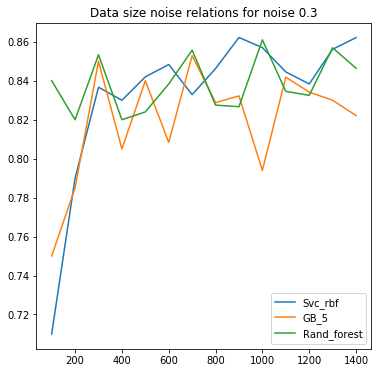

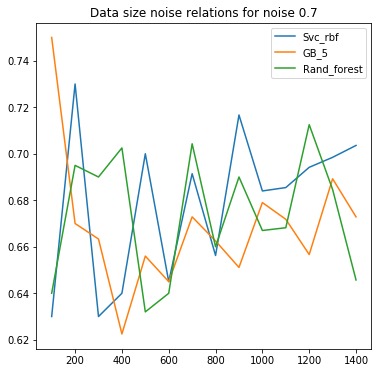

In [10]:

#first we evaluate the dependency from the number of data, keeping the noise constant
def noisefixed(Noise):
    plt.figure(figsize=(6,6))
    for key in models:
        scores=[]
        mod = models[key]
        for N in n_data:

            data=generate_data(N, Noise)
            XTrain=data[0]
            YTrain=data[1]
            XTest=data[2]
            YTest=data[3]
            mod.fit(XTrain, YTrain)
            s=cross_val_score(mod, XTest,YTest, cv=kf)
            scores.append(np.mean(s))
        plt.plot(n_data,scores, label=key)
    plt.title("Data size noise relations for noise "+ str(Noise))
    plt.legend()   

Noise1=0.3
Noise2=0.7


noisefixed(Noise1)    
noisefixed(Noise2)  


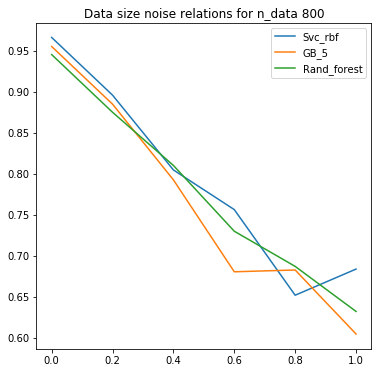

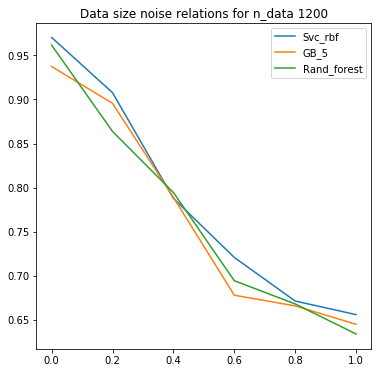

In [11]:
def n_data_fixed(N_data):
    plt.figure(figsize=(6,6))
    for key in models:
        scores=[]
        mod = models[key]
        for level in noise_level:

            data=generate_data(N, level)
            XTrain=data[0]
            YTrain=data[1]
            XTest=data[2]
            YTest=data[3]
            mod.fit(XTrain, YTrain)
            s=cross_val_score(mod, XTest,YTest, cv=kf)
            scores.append(np.mean(s))
        plt.plot(noise_level,scores, label=key)
        plt.title("Data size noise relations for n_data "+ str(N_data))

    plt.legend()   

N1=800
N2=1200
n_data_fixed(N1)
n_data_fixed(N2)